In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/2s2e/cse151a-project/main/steven/data.csv')
df.columns

Index(['Unnamed: 0', 'Artist', 'Album_type', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Stream', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', 'Artist_encoded'],
      dtype='object')

In [3]:
#example 1: clustering danceability and Energy
df_de = df[['Danceability', 'Energy']].sample(n=500, random_state=402)
df_de

,Danceability,Energy
2173,0.571,0.818
5949,0.784,0.518
12353,0.584,0.845
11883,0.844,0.553
8729,0.756,0.762
...,...,...
14492,0.559,0.871
7395,0.466,0.676
18343,0.669,0.628
6720,0.697,0.873


In [4]:
#analyze the K-mean inertia
data = df_de.values
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

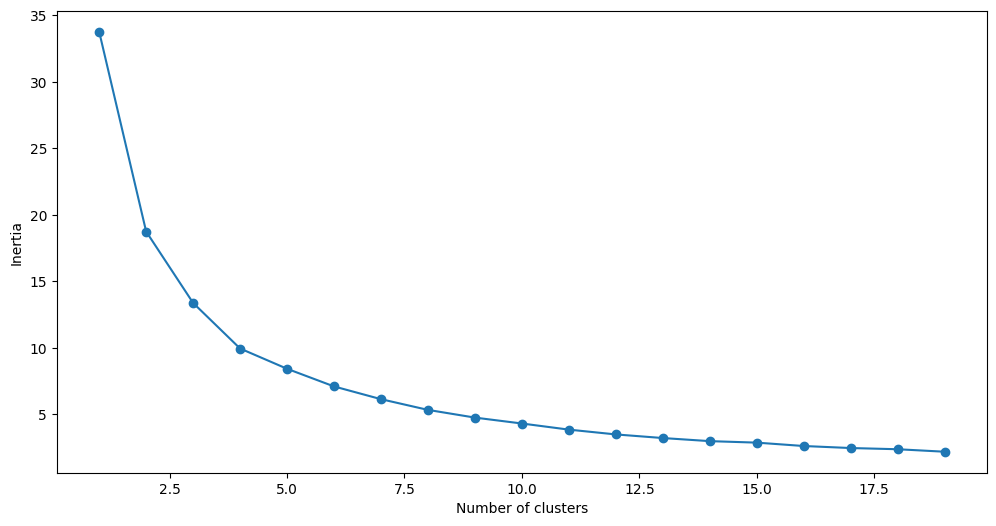

In [5]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [6]:
#Choosing a good number of clusters based on the inertia graph
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(data)
kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9.945915371354507

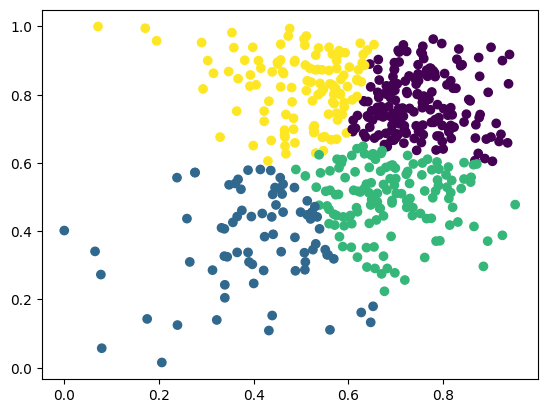

In [7]:
df_array = df_de.to_numpy()
plt.scatter(df_array.T[0], df_array.T[1], c=kmeans.labels_)
plt.show()

In [8]:
#Print out the result
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    172
2    134
3    117
1     77
Name: cluster, dtype: int64

In [9]:
#Example 2: Predicting K mean using Multiple columns
df_2 = df[['Loudness', 'Speechiness', 'Energy']].sample(n=500, random_state=402)
data2 = df_2.values
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data2)
    SSE.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

array([[0.00730277, 0.0415    , 0.818     ],
       [0.00761741, 0.0496    , 0.518     ],
       [0.00794823, 0.066     , 0.845     ],
       ...,
       [0.00773713, 0.0526    , 0.628     ],
       [0.00758339, 0.0282    , 0.873     ],
       [0.00752215, 0.0472    , 0.785     ]])

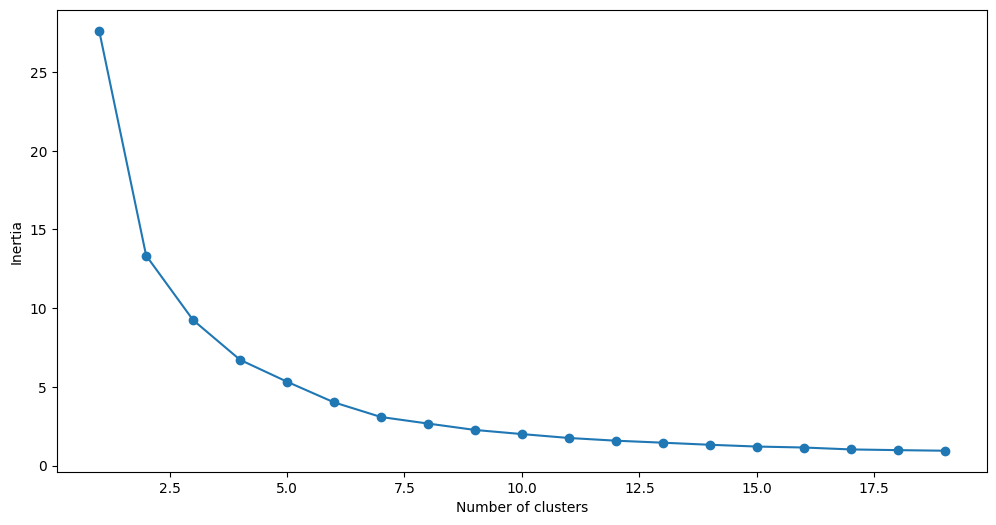

In [10]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
data2

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data2)
kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9.244438054558056

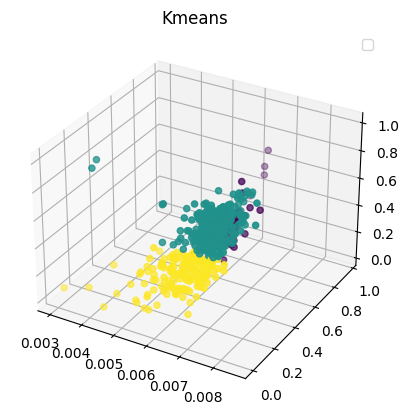

In [12]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 0.007, 1000)
zline = np.linspace(0, 0.08, 1000)
yline = np.linspace(0, 0.8, 1000)

# Data for three-dimensional scattered points
xdata = data2.T[0]
ydata = data2.T[1]
zdata = data2.T[2]
kplot.scatter3D(xdata, ydata, zdata, c=kmeans.labels_);

plt.legend()
plt.title("Kmeans")
plt.show()

In [14]:
pred2 = kmeans.predict(data2)
frame2 = pd.DataFrame(data2)
frame2['cluster'] = pred2
frame2['cluster'].value_counts()

1    275
2    174
0     51
Name: cluster, dtype: int64